# SVM with RBF kernel

In [52]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    Plots confusion matrix, 
    
    cm - confusion matrix
    """
    plt.figure(1, figsize=(15, 12), dpi=160)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

In [53]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

from sklearn.model_selection import GridSearchCV


# generate parameter space of C and Gamma
Gamma = np.outer(np.logspace(-3, 0, 4),np.array([1,5]))
C = np.outer(np.logspace(-1, 1, 3),np.array([1,5]))
Gamma = Gamma.flatten()
C = C_range.flatten()

# grid search with cross validation 
parameters = {'kernel':['rbf'], 'C':C, 'gamma': Gamma}
svm = svm.SVC()
gridsearch = GridSearchCV(estimator=svm,param_grid=parameters,n_jobs=1, verbose=2)
best_params = gridsearch.best_params_

In [54]:
print(params)

{'C': 5, 'gamma': 0.05}


Classification report for classifier SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        48
          1       1.00      0.82      0.90        50
          2       1.00      0.94      0.97        48
          3       1.00      1.00      1.00        50
          4       0.41      1.00      0.58        50
          5       1.00      0.94      0.97        50
          6       1.00      0.78      0.88        50
          7       1.00      0.72      0.84        50
          8       1.00      0.90      0.95        49
          9       1.00      0.80      0.89        50
         10       1.00      0.82      0.90        49
         11       1.00      0.84      0.91        50
         12       1.00      1.00      1.00        4

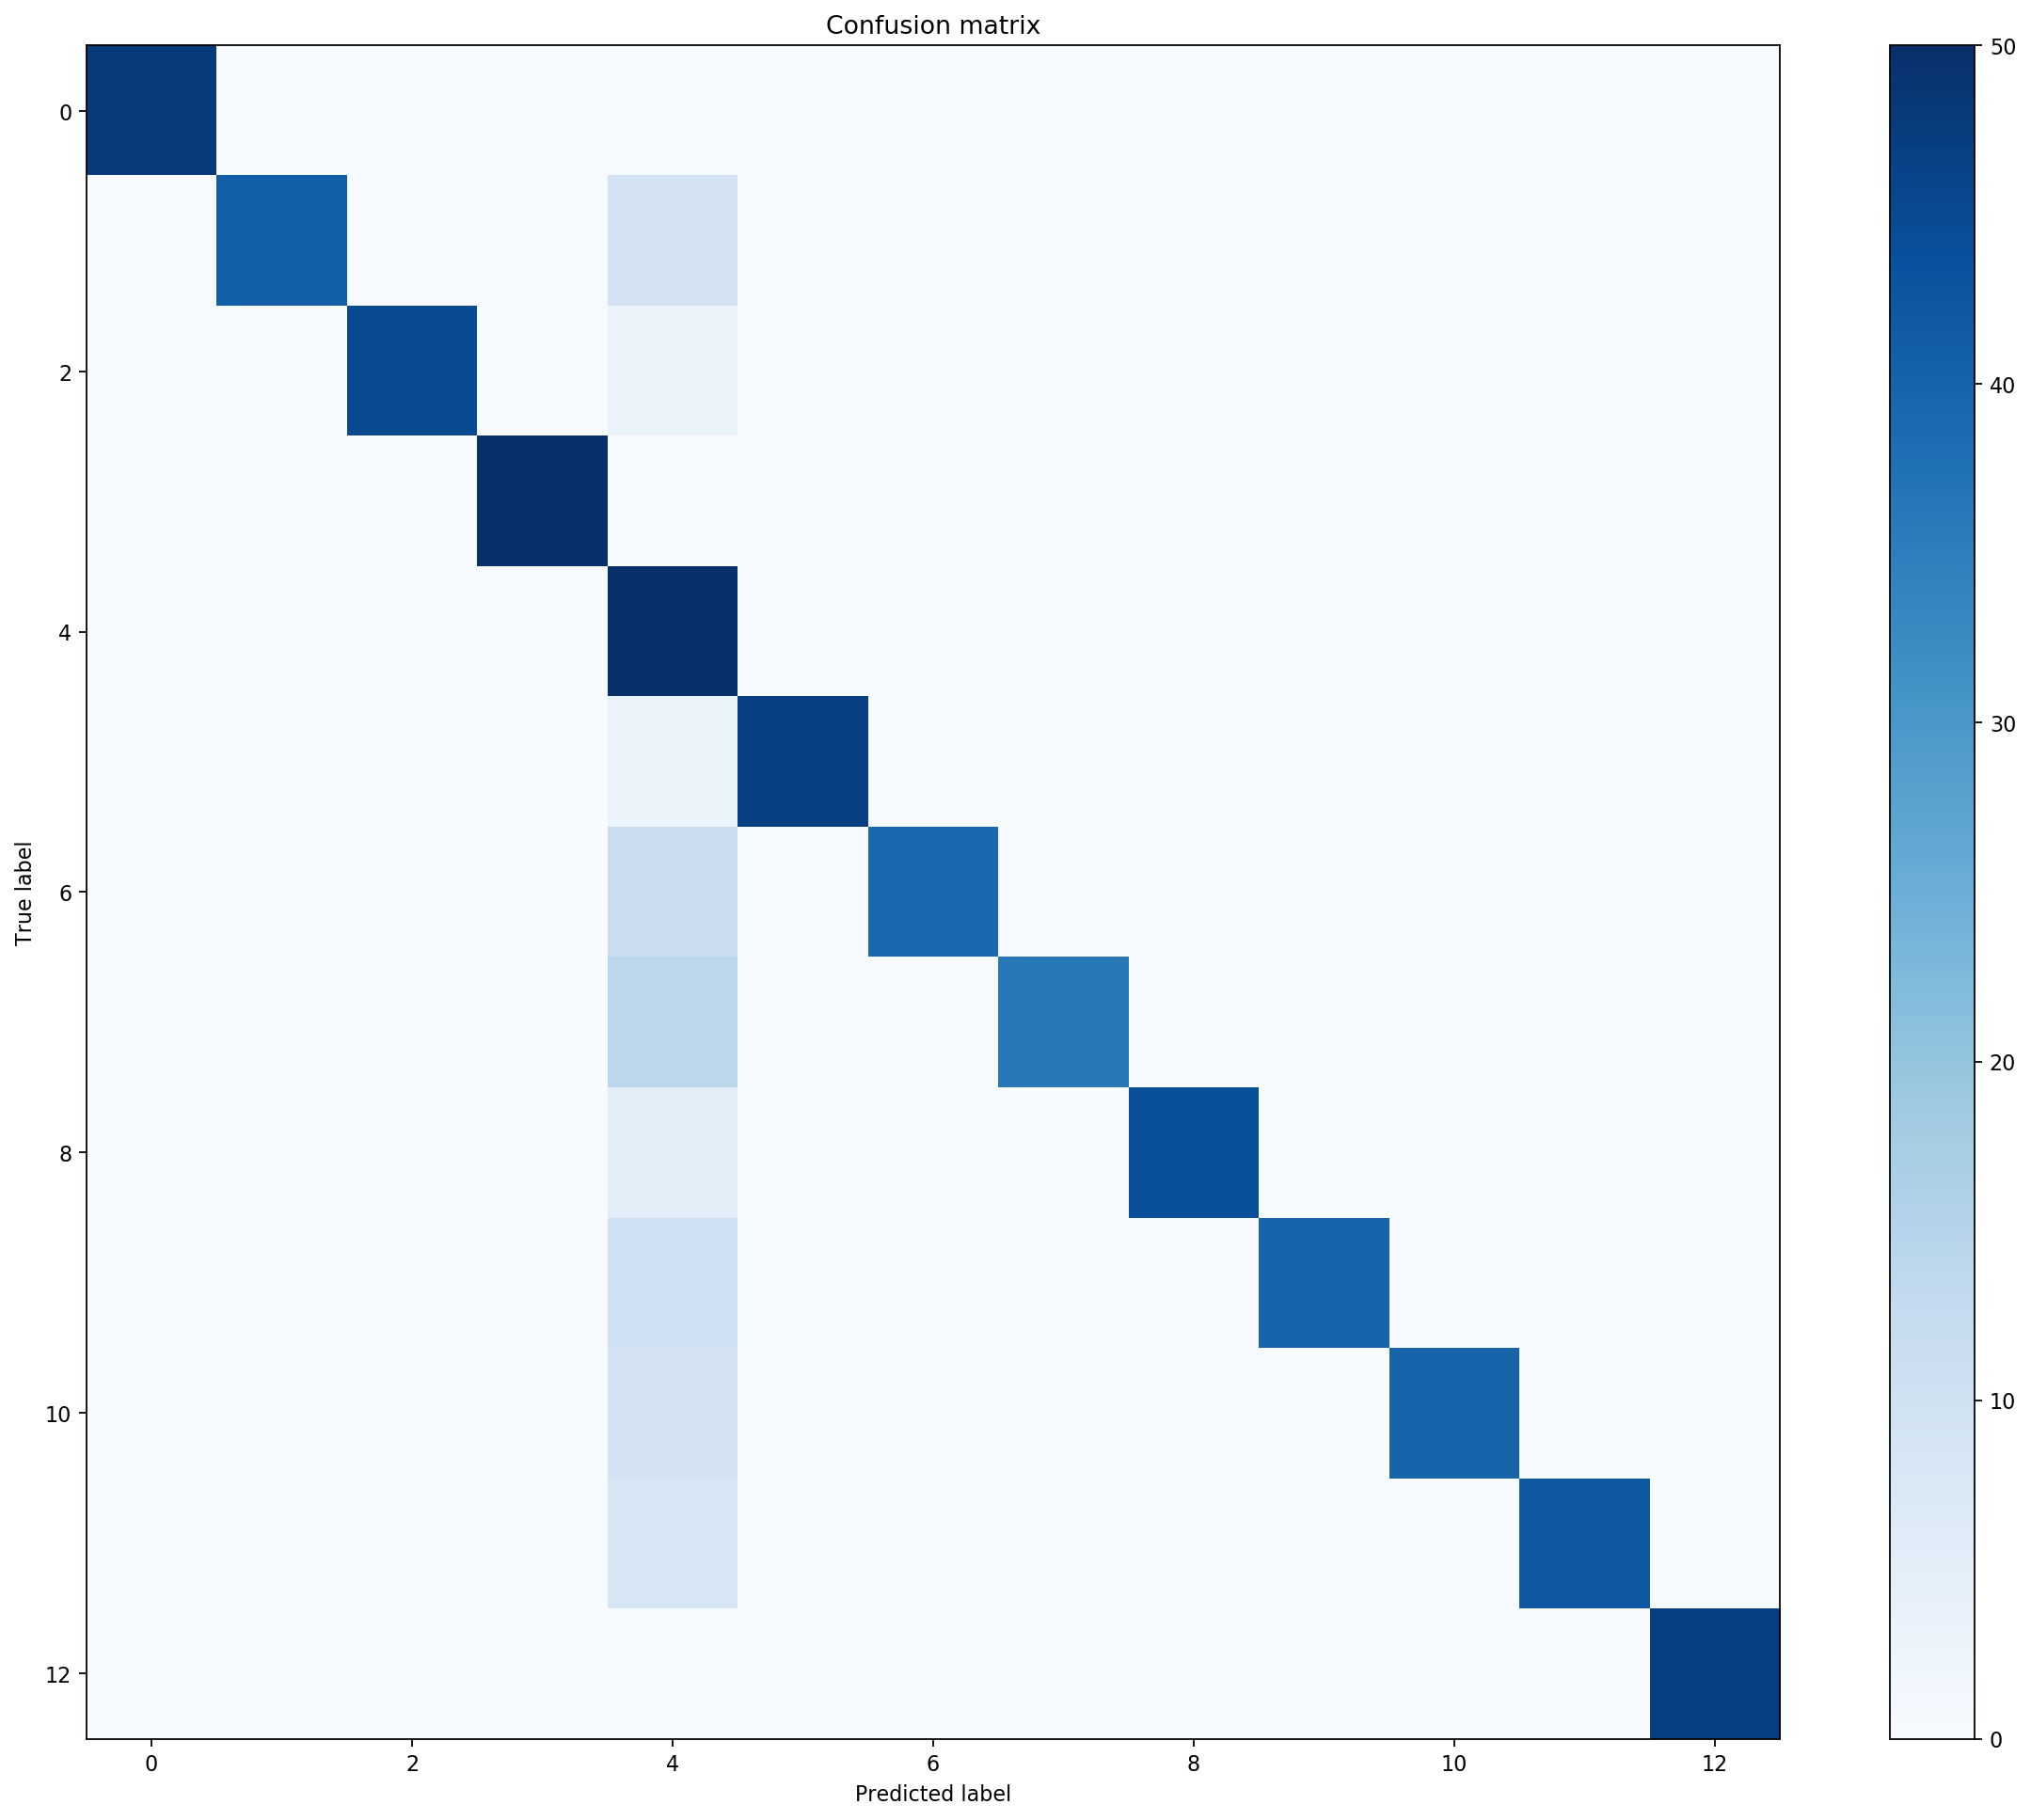

In [57]:
# fit the model with C = 5, gamma = 0.05
svm_model = SVC(kernel = 'rbf',C = 5,gamma = 0.05)
svm_model.fit(X_trainFlat,Y_train)
yhat_svm = svm_model.predict(X_testFlat)

# print the result
print("Classification report for classifier %s:\n%s\n"
      % (svm_model, metrics.classification_report(Y_test, yhat_svm)))
confusion_matrix = metrics.confusion_matrix(Y_test, yhat_svm)
plot_confusion_matrix_svm(confusion_matrix)
print("Accuracy={}".format(metrics.accuracy_score(Y_test, yhat_svm)))